# Notebook to plot power spectra and CF

## Loading packages

In [15]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14

ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]

## Loading power and CF data

In [44]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];
redshifts = ["0", "0.5", "1", "2", "3"];


gev_lcdm=[]
gev_cs2_1=[]
kev_cs2_e4=[]
gev_cs2_e7=[]
# gev_

for i in range(5):
        gev_lcdm.append(load(directory+"//no_RSD//pk3D_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))
        gev_cs2_1.append(load(directory+"/no_RSD//pk3D_gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020_z_"+str(redshifts[i])+".npy"))
        kev_cs2_e4.append(load(directory+"/no_RSD//pk3D_kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020_z_"+str(redshifts[i])+".npy"))
        gev_cs2_e7.append(load(directory+"/no_RSD//pk3D_gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020_z_"+str(redshifts[i])+".npy"))

    
    
# gev -kev power spectrum

pow_gev_cs2_1=[]
pow_kev_cs2_e4=[]
pow_gev_cs2_e7=[]

directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/kevolution_gevolution_power_output/"

# redshifts_gev = [100, 50, 30, 20, 10, 6, 4, 3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25, 0.1, 0]
files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];

# for i in range(np.shape(redshifts)[0]):
for i in range(1):

#         gev_lcdm.append(load(directory+"//no_RSD//pk3D_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))
    pow_gev_cs2_1.append(np.loadtxt(directory+files[3]+"/output/w0d9_cs1_gevolution_pk016_deltacdm.dat"))
    pow_kev_cs2_e4.append(np.loadtxt(directory+files[2]+"/output/kess_cs2e4_4032box_4608_pk014_deltacdm.dat"))
    pow_gev_cs2_e7.append(np.loadtxt(directory+files[1]+"/output/w0d9_cs2_em7_gevolution_pk016_deltacdm.dat"))



# Test Pylians

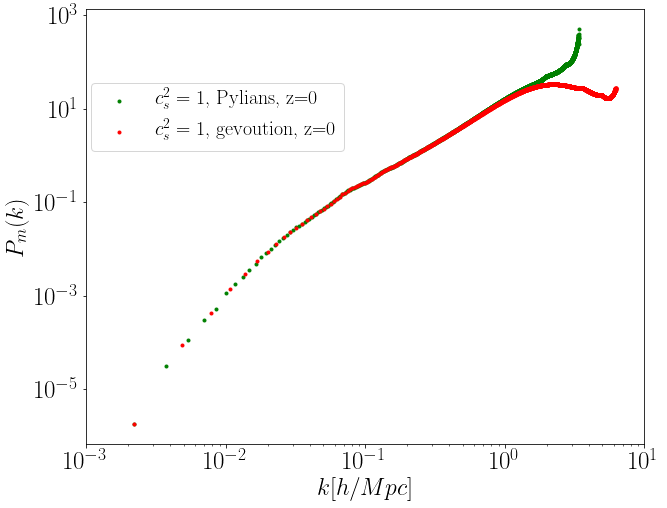

In [75]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))


for i in [0]:
    k= gev_cs2_1[i][0,:];
    plt.loglog(k,gev_cs2_1[i][1,:]*(k**3)/(2.0*np.pi**2),".",color =ColorsI[i+2], lw=3,label="$c_s^2=1$, Pylians, z="+redshifts[i])

plt.loglog(pow_gev_cs2_1[0][:,0],pow_gev_cs2_1[0][:,1],".",color =ColorsI[i], lw=3,label="$c_s^2=1$, gevoution, z="+redshifts[i])
    
    # plt.ylim(1.e1,1.e7)
plt.ylabel('$P_{m}(k)$',fontsize=24)
plt.xlabel('$k[h/Mpc]$',fontsize=24)
# plt.yscale('log')
plt.xticks(size = 25);
plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
plt.xlim(1.e-3,10.e0)
# plt.ylim(1.e2,1.e0)
plt.legend(fontsize=20,bbox_to_anchor=(0.48,0.65))

# Powerspectra comparison

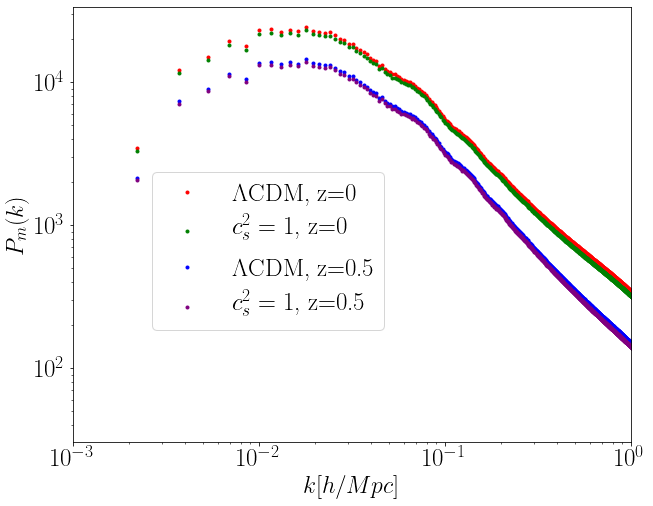

In [78]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

for i in [0,1]:
    plt.loglog(gev_lcdm[i][0,:],gev_lcdm[i][1,:],".",color =ColorsI[i], lw=3,label="$\Lambda$CDM, z="+redshifts[i])
# plt.loglog(P1k_kess_csem7_z1[0,:],P1k_kess_csem7_z1[1,:],".",lw=3,label="$k$-essence, $c_s^2=10^{-7}$")
    plt.loglog(gev_cs2_1[i][0,:],gev_cs2_1[i][1,:],".",color =ColorsI[i+2], lw=3,label="$c_s^2=1$, z="+redshifts[i])


    
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$P_{m}(k)$',fontsize=24)
    plt.xlabel('$k[h/Mpc]$',fontsize=24)
    # plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
    plt.xlim(1.e-3,1.e0)
plt.legend(fontsize=25,bbox_to_anchor=(0.58,0.65))

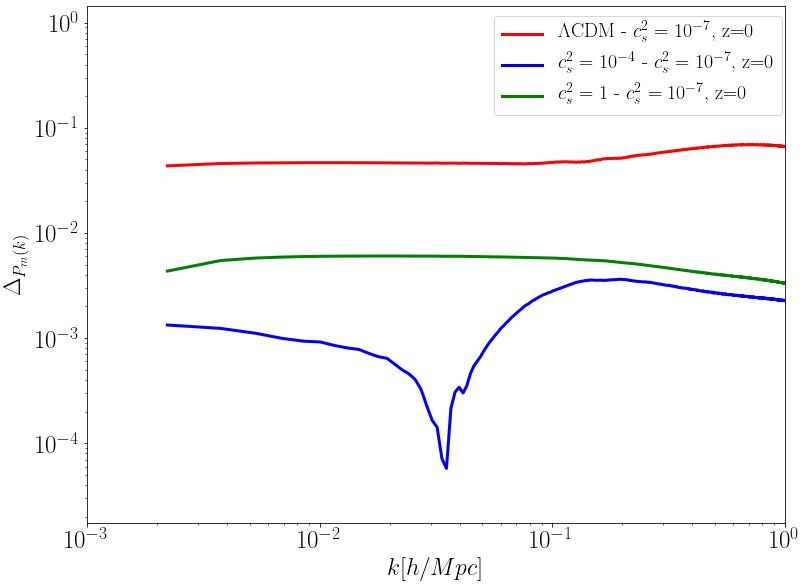

In [80]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.loglog(gev_lcdm[i][0,:],np.abs(gev_lcdm[i][1,:]-gev_cs2_e7[i][1,:])/gev_lcdm[i][1,:],"-",color =ColorsI[i], lw=3,label="$\Lambda$CDM - $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.loglog(gev_lcdm[i][0,:],np.abs(kev_cs2_e4[i][1,:]-gev_cs2_e7[i][1,:])/kev_cs2_e4[i][1,:],"-",color =ColorsI[i+1], lw=3,label="$c_s^2=10^{-4}$ - $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.loglog(gev_lcdm[i][0,:],np.abs(gev_cs2_1[i][1,:]-gev_cs2_e7[i][1,:])/gev_cs2_1[i][1,:],"-",color =ColorsI[i+2], lw=3,label="$c_s^2=1$ - $c_s^2=10^{-7}$, z="+redshifts[i])

    fig.legend(fontsize=20,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\Delta_{P_{m}(k)}$',fontsize=24)
    plt.xlabel('$k[h/Mpc]$',fontsize=24)
    # plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
    plt.xlim(1.e-3,1.e0)

In [82]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];
redshifts = ["0", "0.5", "1", "2", "3"];


gev_lcdm_c=[]
gev_cs2_1_c=[]
kev_cs2_e4_c=[]
gev_cs2_e7_c=[]
# gev_

for i in range(5):

        gev_lcdm_c.append(load(directory+"/no_RSD///CF_full_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))
        gev_cs2_1_c.append(load(directory+"/no_RSD/CF_full_gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020_z_"+str(redshifts[i])+".npy"))
        kev_cs2_e4_c.append(load(directory+"/no_RSD/CF_full_kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020_z_"+str(redshifts[i])+".npy"))
        gev_cs2_e7_c.append(load(directory+"/no_RSD/CF_full_gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020_z_"+str(redshifts[i])+".npy"))



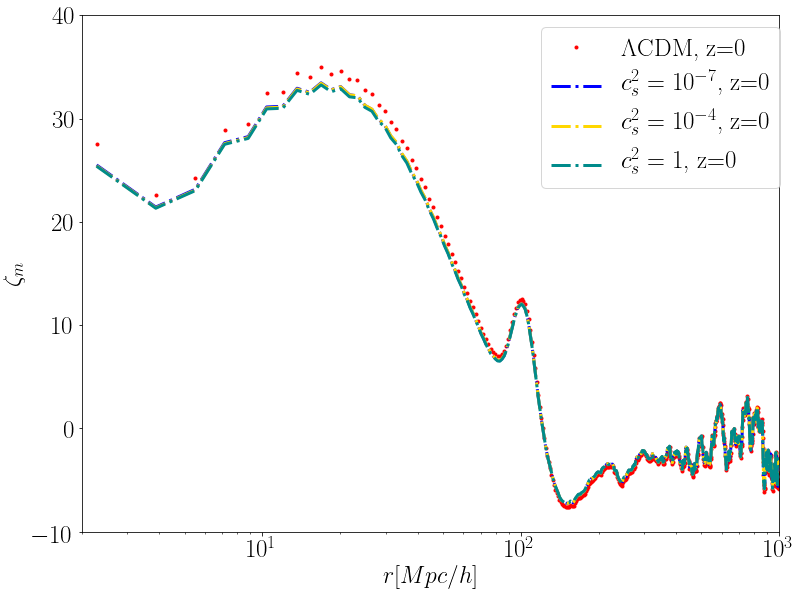

In [169]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.plot(gev_lcdm_c[i][0,:],gev_lcdm_c[i][0,:]**2 * gev_lcdm_c[i][1,:],".",color =ColorsI[i], lw=3,label="$\Lambda$CDM, z="+redshifts[i])
# plt.loglog(P1k_kess_csem7_z1[0,:],P1k_kess_csem7_z1[1,:],".",lw=3,label="$k$-essence, $c_s^2=10^{-7}$")
    plt.plot(gev_cs2_e7_c[i][0,:],gev_cs2_e7_c[i][0,:]**2 * gev_cs2_e7_c[i][1,:],"-.",color =ColorsI[i+1], lw=3,label="$c_s^2=10^{-7}$, z="+redshifts[i])
    plt.plot(kev_cs2_e4_c[i][0,:],kev_cs2_e4_c[i][0,:]**2 * kev_cs2_e4_c[i][1,:],"-.",color =ColorsI[i+5], lw=3,label="$c_s^2=10^{-4}$, z="+redshifts[i])

    plt.plot(gev_cs2_1_c[i][0,:],gev_cs2_1_c[i][0,:]**2 * gev_cs2_1_c[i][1,:],"-.",color =ColorsI[i+4], lw=3,label="$c_s^2=1$, z="+redshifts[i])

    fig.legend(fontsize=25,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\zeta_{m}$',fontsize=24)
    plt.xlabel('$r[Mpc/h]$',fontsize=24)
    plt.xscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
    plt.ylim(-10,40)
    plt.xlim(2,1.e3)

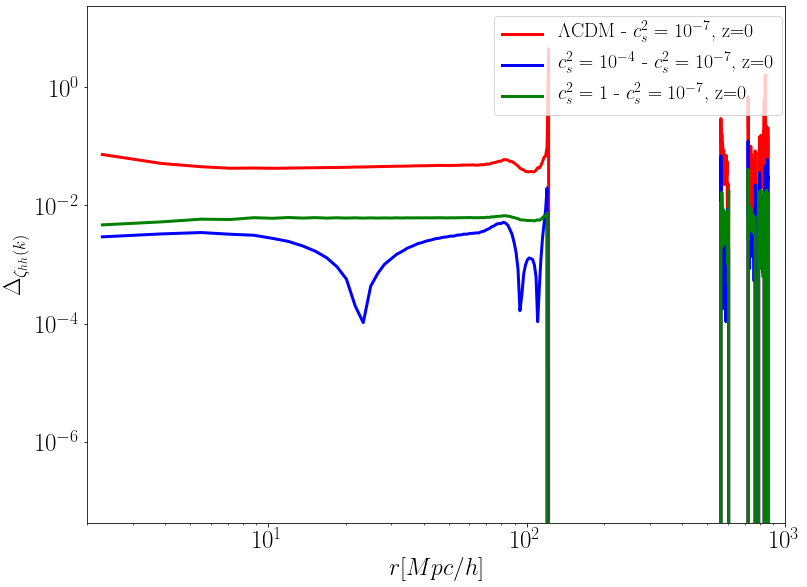

In [131]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.loglog(gev_lcdm_c[i][0,:],np.abs(gev_lcdm_c[i][1,:]-gev_cs2_e7_c[i][1,:])/gev_lcdm_c[i][1,:],"-",color =ColorsI[i], lw=3,label="$\Lambda$CDM - $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.loglog(gev_lcdm_c[i][0,:],np.abs(kev_cs2_e4_c[i][1,:]-gev_cs2_e7_c[i][1,:])/kev_cs2_e4_c[i][1,:],"-",color =ColorsI[i+1], lw=3,label="$c_s^2=10^{-4}$ - $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.loglog(gev_lcdm_c[i][0,:],np.abs(gev_cs2_1_c[i][1,:]-gev_cs2_e7_c[i][1,:])/gev_cs2_1_c[i][1,:],"-",color =ColorsI[i+2], lw=3,label="$c_s^2=1$ - $c_s^2=10^{-7}$, z="+redshifts[i])

    fig.legend(fontsize=20,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\Delta_{\zeta_{hh}(k)}$',fontsize=24)
    plt.xlabel('$r[Mpc/h]$',fontsize=24)
    # plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
    plt.xlim(2,1000)

(0.01, 400)

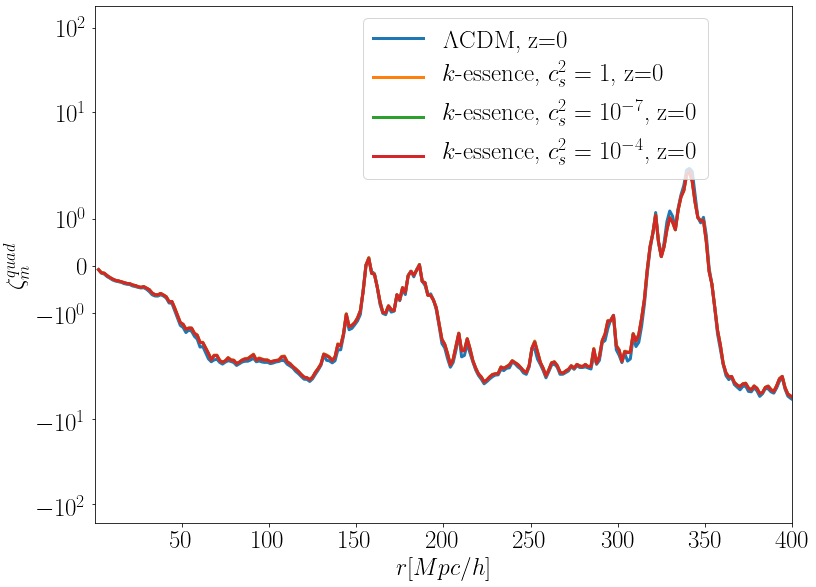

In [163]:

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.plot(gev_lcdm_c[i][0,:],gev_lcdm_c[i][2,:]*gev_lcdm_c[i][0,:]**2,"-",lw=3,label="$\Lambda$CDM, z="+redshifts[i])
    plt.plot(gev_cs2_1_c[i][0,:],gev_cs2_1_c[i][0,:]**2 * gev_cs2_1_c[i][2,:],"-",lw=3,label="$k$-essence, $c_s^2=1$, z="+redshifts[i])

    
    plt.plot(gev_cs2_e7_c[i][0,:],gev_cs2_e7_c[i][2,:]*gev_cs2_e7_c[i][0,:]**2,"-",lw=3,label="$k$-essence, $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.plot(kev_cs2_e4_c[i][0,:],kev_cs2_e4_c[i][2,:]*kev_cs2_e4_c[i][0,:]**2,"-",lw=3,label="$k$-essence, $c_s^2=10^{-4}$, z="+redshifts[i])


fig.legend(fontsize=25,bbox_to_anchor=(0.8,0.85))
# plt.ylim(1.e1,1.e7)
plt.ylabel('$\zeta^{quad}_{m}$',fontsize=24)
plt.xlabel('$r[Mpc/h]$',fontsize=24)
plt.yscale('symlog')
plt.xticks(size = 25);
plt.yticks(size = 25);
# plt.ylim(-1.e2,1.e2)
plt.xlim(0.01,400)



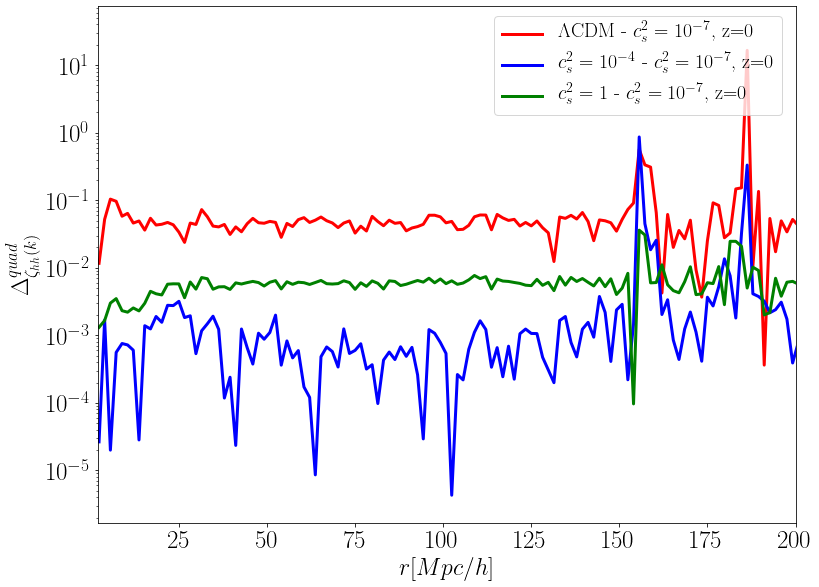

In [167]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.plot(gev_lcdm_c[i][0,:],np.abs((gev_lcdm_c[i][2,:]-gev_cs2_e7_c[i][2,:])/gev_lcdm_c[i][2,:]),"-",color =ColorsI[i], lw=3,label="$\Lambda$CDM - $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.plot(gev_lcdm_c[i][0,:],np.abs((kev_cs2_e4_c[i][2,:]-gev_cs2_e7_c[i][2,:])/kev_cs2_e4_c[i][2,:]),"-",color =ColorsI[i+1], lw=3,label="$c_s^2=10^{-4}$ - $c_s^2=10^{-7}$, z="+redshifts[i])
    plt.plot(gev_lcdm_c[i][0,:],np.abs((gev_cs2_1_c[i][2,:]-gev_cs2_e7_c[i][2,:])/gev_cs2_1_c[i][2,:]),"-",color =ColorsI[i+2], lw=3,label="$c_s^2=1$ - $c_s^2=10^{-7}$, z="+redshifts[i])

    fig.legend(fontsize=20,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\Delta_{\zeta_{hh}(k)}^{quad}$',fontsize=24)
    plt.xlabel('$r[Mpc/h]$',fontsize=24)
    plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(-1.,1.)
    plt.xlim(2,200)